# Algebra linear computacional

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Sistemas lineares

### Substituição para frente(Forward Substitution)
Substituição para Frente é um método utilizado para resolver sistemas de equações lineares na forma:
 $$L y = b$$

Onde : 
* L é uma matriz triangular inferior
* y é o vetor de incógnitas intermediárias
* b é o vetor constantes

Exemplo hipotetico abaixo:

In [4]:
# L
np.tri(N=3, M=5)

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.]])

In [5]:
# L
np.tri(N=7, M=7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [6]:
np.random.RandomState(1).randn(5,1).T

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763]])

#### Teorema 1.3.1

Seja $G$ uma matrix triangular. Então ,$G$ é invertivel se, e somente se, todos elementos da diagonal principal de $G$ são diferentes de zero.

$DET(G) \not = 0$ , se G é invertivel
* $det(G) = g_{11}g_{22}...g_{nn} \not = 0$ para $i = 1, 2, ..., n$

In [7]:
def prova(G):
    try: 
        inv = np.linalg.inv(G)
        return inv
    except Exception:
        raise ValueError("Não é invertivel")

In [8]:
try:
    prova(
        np.array([[1, 2, 2],
              [0, 0, 3],
              [0, 0, 1]])
    )
except Exception:
    print("Não tem inversa")

Não tem inversa


In [9]:
prova(
    np.array([[1,1,1],[0,1,1],[0,0,1]])
)

array([[ 1., -1.,  0.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  1.]])

&nbsp;

#### Transformando a matriz em $L$

In [10]:
def transformL(A):
    # regra de cramer
    if np.linalg.det(A) == 0:
        raise Exception("Não tem inversa")
    
    for i in reversed(range(A.shape[0])):
        u_ = A[i, i]
        
        if i == 0 or u_ == 0: break
        for j in reversed(range(i)):
            L = A[j, i]/u_
            A[j, : ] = np.around(A[j, :] - L * A[i, :], decimals=4)
               
    return A

In [11]:
A = np.array([
    [5, 3, 3],
    [4, 5, 6],
    [2, 4, 7]
])
b = np.around(
    np.random.RandomState(1).randn(3, 1)
    )

In [12]:
A, b

(array([[5, 3, 3],
        [4, 5, 6],
        [2, 4, 7]]),
 array([[ 2.],
        [-1.],
        [-1.]]))

In [13]:
L = transformL(A)

#### Algoritmo de substituição

```pseudo
_______________________________________
ALG.....: ALGORITMO DE SUBSTITUIÇÃO
ENTRADA.: L e b
SAIDA...: y
---------------------------------------
INICIO:
    CRIA Y = [0....][TAMANHO = N]

    Y[1] = b1 / L[1, 1]
    PARA i = 2 FAÇA ATÉ N:
        S = 0 
        PARA j FAÇA ATÉ i-1:
            S += L[i, j] * y[j]

        Y[i] = 1/L[i, i] * (b[i] - S)
    RETURN Y
```

In [14]:
def forwardSubstitution(L, b):
    # criando um vetor y
    y  = np.zeros(shape=(L.shape[1], 1)) 

    # definindo y[0] 
    y[0, :] = b[0, :]/ L[0, 0]

    # continuando o alg de substituição
    for i in range(1, L.shape[0]):
        S = np.sum(np.multiply(L[i,:i],  y[:i].T))
        y[i, :] = 1/L[i,i] * (b[i, :] - S )
    return y

In [15]:
y = forwardSubstitution(L, b)
y

array([[ 1.        ],
       [-3.        ],
       [ 1.28571429]])

In [16]:
y = forwardSubstitution(L, b)
y

array([[ 1.        ],
       [-3.        ],
       [ 1.28571429]])

In [17]:
np.linalg.solve(A, b)

array([[ 1.        ],
       [-3.        ],
       [ 1.28571429]])

Outro exemplo

In [18]:
A = np.random.RandomState(1).randn(5, 5)*10
A = np.around(A, decimals=2)

b = np.random.RandomState(1).randn(5, 1)*1
b = np.around(b, decimals=2)

A, b

(array([[ 16.24,  -6.12,  -5.28, -10.73,   8.65],
        [-23.02,  17.45,  -7.61,   3.19,  -2.49],
        [ 14.62, -20.6 ,  -3.22,  -3.84,  11.34],
        [-11.  ,  -1.72,  -8.78,   0.42,   5.83],
        [-11.01,  11.45,   9.02,   5.02,   9.01]]),
 array([[ 1.62],
        [-0.61],
        [-0.53],
        [-1.07],
        [ 0.87]]))

In [19]:
L = transformL(A) 

In [20]:
forwardSubstitution(L, b)

array([[-0.06578279],
       [-0.14954343],
       [ 0.0508016 ],
       [ 0.68862814],
       [-0.22831741]])

In [21]:
np.linalg.solve(A, b)

array([[-0.06578279],
       [-0.14954343],
       [ 0.0508016 ],
       [ 0.68862814],
       [-0.22831741]])

&nbsp;

## Decomposição de $\text{Choesky}$

É a decomposição de uma matriz simetrica e definida positiva no produto de uma matriz triangular inferior e sua transpota($A=LL^t$)
Quando aplicável, a decomposição é aproximadamente duas vezes mais eficiente que a decomposição LU para resolver sistemas de equações linares.

#### Condições

**Simetrica:** $A$ deve ser simétrica ($A=A^t$).

**Positividades:**
1. Todos os menores principais dominantes dever ser positivos
2. Todos os autovalores devem ser positivos

exemplo:

In [22]:
# Verificando se a matrix é simetrica
def isSimetric(A):
    return np.all(A == A.T)

In [23]:
A_ = np.array([
    [2, 1, 1],
    [1, 3, 1],
    [1, 1, 2]
])

In [24]:
isSimetric(A_)

True

In [25]:
# Verificando a positividade da matriz
def Positividade(A):
    return np.all(
        np.linalg.eigvals(A) >0
    )
    

In [26]:
Positividade(A_)

True

&nbsp;

#### Algoritmo de $\text{cholesky}$

$$
\text{Inicialize L com uma matriz triangular inferior com seros} \\

1.L_{j,j} = \sqrt{A_{j,j} - \sum_{k-1}^{j-1}{L_{j,k}}^2} \\
2. L_{i,j} = \frac{1}{L_{i,j}} ({A_{j,j} - \sum_{k-1}^{j-1}{L_{j,k}} \cdot L_{i,k}}) , \text{para } i> j
$$


In [27]:
def cholesky(A):
    N, M = A.shape
    L = np.tri(N, M)

    for i in range(A.shape[0]):
        for j in range(i):
            L[i, j] = (1/L[j, j]) * (A[i, j] - np.sum([L[j, k] * L[i, k] for k in range(j)]))
       
        L[i, i] = np.sqrt(A[i, i] - np.sum([L[i, k]**2 for k in range(i)]))
    return L       

In [28]:
L = cholesky(A_)

In [29]:
L@L.T, L

(array([[2., 1., 1.],
        [1., 3., 1.],
        [1., 1., 2.]]),
 array([[1.41421356, 0.        , 0.        ],
        [0.70710678, 1.58113883, 0.        ],
        [0.70710678, 0.31622777, 1.18321596]]))

&nbsp;

## Decomposição $LU$

É a fatoração de uma matriz quadrada A em duas matrizes: 
* $L$ triangular inferior
```pseudo
[1, 0, 0]
[1, 1, 0]
[1, 1, 1]
```
* $U$ triangular superior
```pseudo
[1, 1, 1]
[0, 1, 1]
[0, 0, 1]
```

A decomposiçã $LU$ facilita a resoluçã de sistemas lineares, especialmente quando o sistema é a parte do múltiplos sistemas com a mesma matriz de coeficientes. Foi desenvolvidas a partir do método de eleminação de Gauss, adaptando-o para uma fatoração matricial

#### Vantagem Computacional

| Tradicional | LU |
| ----------- | -- |
| $O(n^3)$ opereções para cada sistema   | Fatorar $A = LU$ uma única vez: $O(n^3)$ operações|
|         | Para cada novo sistema, resolver $Ly = b$, Ux=y. "Apenas" $O(n^2)$ operações por sistema|

#### Condições
Existencias:
A matriz deve ser nao singular. Eventualmente, pode ser necessário alterar a ordem das linhas e/ou colunas de $A$ para evitar pivos nulos(**pivoteamento**)
$$
PA=LU
$$
Onde $P$ é matriz de permutação

>uma matriz é chamada de singular se:
> 1. Seu determinante é igual a zero (det(𝐴)=0)
> 2. Ela não possui inversa.
> 

In [30]:
def isSingular(A):
    try:
        if np.isclose(np.linalg.det(A), 0):
            print("det = 0")
        else:
            print("det dif 0")
        
        np.linalg.inv(A)
        print("Possui inversa")
    except np.linalg.LinAlgError:
        print("Não possui inversa")

In [31]:
isSingular(A)

det dif 0
Possui inversa


#### Algoritmo

In [32]:
import copy 

def decomposicaoLU(A, b):
    N, M = A.shape
    L = np.diag(np.ones(M))
   
    U = copy.deepcopy(L)

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if i<=j:
                U[i, j] = A[i, j] - np.sum(L[i, :j] * U[:j, j])
            if i >j:
                L[i, j] =  (A[i, j] - np.sum(L[i, :i] * U[:i, j])) / U[j, j]
                
    return L, U

In [33]:
A1 = np.array(
    [[1,4,-3],
     [-2,4,5],
     [3,4,7]]
)
b1 = np.array([1,2,3])

In [34]:
L, U = decomposicaoLU(A1, b1)

In [35]:
L@U

array([[ 1.,  4., -3.],
       [-2.,  4.,  5.],
       [ 3.,  4.,  7.]])

&nbsp;

## Mínimos Quadrados

### Introdução ao problema de Mínimos Quadrados Discretos

In [36]:
random = np.random.RandomState(seed=10)
x = random.randn(30, 1)*10 + random.uniform(low=-10, high=3, size=(30,1))
y = x * 4 + random.uniform(low=-10, high=3, size=(30, 1))

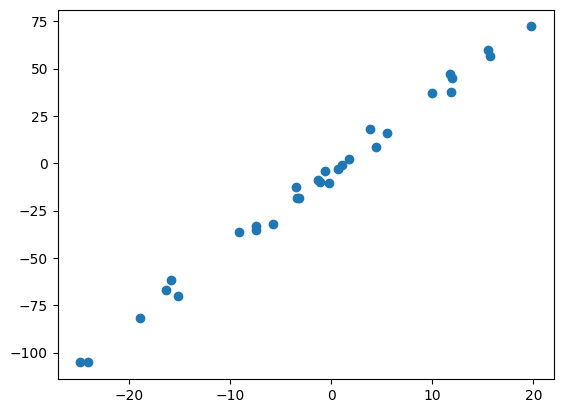

In [37]:
plt.scatter(x, y)
plt.show()

Dados um conj. de pontos de dados discretos ${(t_i, y_i)}_{i=1}^m$, o objetivo d problema de mínimos quadrados discreto é encontrar um polinomio $p(t)$ de grau $d$ que aproxime esse dados minimizando o erro residual.

#### Formulação Matemática
Objetivo é minimizar a soma dos quadrados dos resíduos:
$$
\min_{a_1, ... a_j}{\sum_{i-1}^{m}(y_i - p(t_i))^2}
$$

#### Representação matricial
Podemos reescrever o problema em termos matriciais como:
$$
y = Va
$$
onde :
$$
\begin{bmatrix}
1 & t_1 & t^2_1 & ... & t_1^d\\
1 & t_2 & ..... & ... & t_2^d\\
1 & ... & ..... & ... & t_3^d\\
1 & t_m & t^2_m & ... & t_m^d\\
\end{bmatrix}

\begin{bmatrix}
a_0 \\
.   \\
.   \\
a_d
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
.   \\
.   \\
y_m
\end{bmatrix}
$$

#### Métodos dos mínimos quadrados

Dado um sistema sobredeterminado $Ax=b$ :
* $A \in R^{m X n}, m>>n$, (mais equações de que incógnitas)
* Queremos minimizar o error residual:
$$
\min{||AX - b||^2_2}
$$

A solução é dada pelas equações normais[1]:
$$

A^T Ax = A^Tb
$$
que é um sistema linear de n equações e n incógnitas.

#### Decomposição $QR$
A decomposição $QR$ de uma matriz $A \in R^{mXn}(m >= n)$ é a fatoração de $A$ em:
$$
A = QR
$$
onde :
* $Q \in R^{mXn}$ é uma matriz ortogonal ($Q^TQ=I$)
* $R \in R^{mXn}$ é uma matriz triangular superior

#### Processo de GRAM-Schmidt

In [38]:
def projecao(v, q):
    return ( np.dot(v, v.T) / np.dot(q, q.T) ) * q 

def decomposicaoQR(A):
    row, col = A.shape

    if col > row:
        raise Exception('n colunas > n linhas')
    Q = np.zeros(shape=(row, col))
    R = np.tri(row, row).T

    for i in range(col):
        u = A[:, i]

        for j in range(i):
            R[j, i] = np.dot(Q[:, j], A[:, i])
            u = u - R[j, i] * Q[:, j]

        R[i, i] = np.linalg.norm(u)
        Q[:, i] = u / R[i, i]
    return Q, R

In [53]:
A = np.random.RandomState(1).randn(10,1) 
b = np.random.RandomState(1).randn(10,1)
A_ = np.c_[np.ones(shape=(10, 1)), A]

In [54]:
Q, R = decomposicaoQR(A)

In [47]:
np.linalg.inv(A_.T@A_)@A_.T@b

array([[-2.94902991e-17],
       [ 1.00000000e+00]])